# Nama : Muhammad Hamzah Fyrzatullah
# Alamat : Kabupaten Bekasi Jawa Barat
# Email : muhammadhamzahf@gmail.com

In [1]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadhamzahf","key":"8bd79a06216f3333f43e0113d49c3cd5"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d shrutinikkigupta/movie-reviews-imdb

 82% 41.0M/50.1M [00:00<00:00, 43.2MB/s]
100% 50.1M/50.1M [00:00<00:00, 68.5MB/s]


In [4]:
ls

kaggle.json  movie-reviews-imdb.zip  sample_data/


In [5]:
import pandas as pd
import zipfile
zip_ref = zipfile.ZipFile('movie-reviews-imdb.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

df = pd.read_csv('/content/files/train.csv')
df.head()

,Unnamed: 0,reviews,labels
0,0,Bromwell High is a cartoon comedy. It ran at t...,1
1,1,Homelessness (or Houselessness as George Carli...,1
2,2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,3,This is easily the most underrated film inn th...,1
4,4,This is not the typical Mel Brooks film. It wa...,1


In [23]:
category = pd.get_dummies(df.labels)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['labels'])
df_baru

,Unnamed: 0,reviews,0,1
0,0,Bromwell High is a cartoon comedy. It ran at t...,0,1
1,1,Homelessness (or Houselessness as George Carli...,0,1
2,2,Brilliant over-acting by Lesley Ann Warren. Be...,0,1
3,3,This is easily the most underrated film inn th...,0,1
4,4,This is not the typical Mel Brooks film. It wa...,0,1
...,...,...,...,...
24995,12495,"Towards the end of the movie, I felt it was to...",1,0
24996,12496,This is the kind of movie that my enemies cont...,1,0
24997,12497,I saw 'Descent' last night at the Stockholm Fi...,1,0
24998,12498,Some films that you pick up for a pound turn o...,1,0


In [24]:
reviews = df_baru['reviews'].values
labels = df_baru[[0,1]].values

In [25]:
from sklearn.model_selection import train_test_split
reviews_train, reviews_test, labels_train, labels_test = train_test_split(reviews, labels, test_size=0.2)

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [27]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(reviews_train)
tokenizer.fit_on_texts(reviews_test)

sequences_train = tokenizer.texts_to_sequences(reviews_train)
sequences_test = tokenizer.texts_to_sequences(reviews_test)

padded_train = pad_sequences(sequences_train)
padded_test = pad_sequences(sequences_test)

In [51]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [53]:
num_epochs = 30
history = model.fit(padded_train, labels_train,
                    epochs=num_epochs,
                    validation_data=(padded_test, labels_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
625/625 - 43s - loss: 0.4631 - accuracy: 0.7644 - val_loss: 0.3983 - val_accuracy: 0.8538
Epoch 2/30
625/625 - 43s - loss: 0.2849 - accuracy: 0.8882 - val_loss: 0.3956 - val_accuracy: 0.8356
Epoch 3/30
625/625 - 43s - loss: 0.2386 - accuracy: 0.9069 - val_loss: 0.4059 - val_accuracy: 0.8416
Epoch 4/30
625/625 - 44s - loss: 0.2055 - accuracy: 0.9215 - val_loss: 0.3535 - val_accuracy: 0.8672
Epoch 5/30
625/625 - 44s - loss: 0.1793 - accuracy: 0.9338 - val_loss: 0.4237 - val_accuracy: 0.8240
Epoch 6/30
625/625 - 44s - loss: 0.1543 - accuracy: 0.9428 - val_loss: 0.3813 - val_accuracy: 0.8634
Epoch 7/30
625/625 - 44s - loss: 0.1407 - accuracy: 0.9495 - val_loss: 0.4534 - val_accuracy: 0.8570
Epoch 8/30

Akurasi telah mencapai >95%!
625/625 - 44s - loss: 0.1186 - accuracy: 0.9585 - val_loss: 0.5153 - val_accuracy: 0.8592


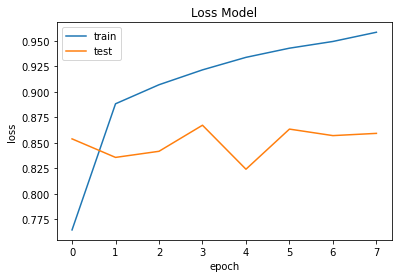

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()